In [1]:
import pandas as pd
import torch

In [3]:
df = pd.read_csv('추자도.csv', encoding='cp949')
df

,지점,일시,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,22184,2014-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.9,NaN,4.3
1,22184,2014-01-16,4.2,1029.6,60.0,4.4,14.6,1.0,0.6,0.9,1.4,3.3,4.3
2,22184,2014-01-17,3.7,1026.9,59.0,6.1,14.8,0.7,0.4,0.7,1.1,3.3,9.1
3,22184,2014-01-18,8.8,1028.5,66.0,5.8,14.9,2.8,1.8,2.7,4.2,5.3,7.1
4,22184,2014-01-19,3.8,1029.1,66.0,4.6,14.8,1.6,1.0,2.0,3.4,5.6,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,22184,2022-12-27,6.8,1028.8,63.0,5.6,16.1,1.3,0.8,1.0,1.5,3.7,4.6
3077,22184,2022-12-28,7.2,1030.4,59.0,5.6,16.0,1.6,1.0,1.3,2.3,4.5,5.8
3078,22184,2022-12-29,6.5,1032.6,59.0,4.9,16.1,1.5,0.9,1.1,1.9,4.7,6.4
3079,22184,2022-12-30,6.9,1032.3,53.0,5.8,16.2,1.5,0.9,1.2,2.0,4.3,4.9


In [5]:
df = df.rename(columns={'일시': 'date', '평균기압(hPa)': 'Apress(hPa)', '평균 기온(°C)': 'Atemp(°C)', '평균 수온(°C)': 'Stemp(°C)'})
df=df.set_index(pd.to_datetime(df.date)) # Date를 인덱스로
df=df[['Apress(hPa)','Atemp(°C)','Stemp(°C)']] # Column 재정리
df

,Apress(hPa),Atemp(°C),Stemp(°C)
date,,,
2014-01-15,NaN,NaN,NaN
2014-01-16,1029.6,4.4,14.6
2014-01-17,1026.9,6.1,14.8
2014-01-18,1028.5,5.8,14.9
2014-01-19,1029.1,4.6,14.8
...,...,...,...
2022-12-27,1028.8,5.6,16.1
2022-12-28,1030.4,5.6,16.0
2022-12-29,1032.6,4.9,16.1


In [6]:

import numpy as np

df = df[['Stemp(°C)']]

df.loc[df['Stemp(°C)'] == 0, 'Stemp(°C)'] = np.nan

df = df.dropna()
df

C:\Users\admin\AppData\Local\Temp\ipykernel_5240\434925358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['Stemp(°C)'] == 0, 'Stemp(°C)'] = np.nan


,Stemp(°C)
date,
2014-01-16,14.6
2014-01-17,14.8
2014-01-18,14.9
2014-01-19,14.8
2014-01-20,14.6
...,...
2022-12-27,16.1
2022-12-28,16.0
2022-12-29,16.1


In [18]:
monthly_avg_temp = df['Stemp(°C)'].resample('M').mean()
monthly_avg_temp

date
2014-01-31    14.475000
2014-02-28    13.252381
2014-03-31    12.683333
2014-04-30    13.646429
2014-05-31    18.000000
                ...    
2022-08-31    28.258065
2022-09-30    24.727586
2022-10-31    20.574194
2022-11-30    18.079310
2022-12-31    16.151613
Freq: M, Name: Stemp(°C), Length: 108, dtype: float64

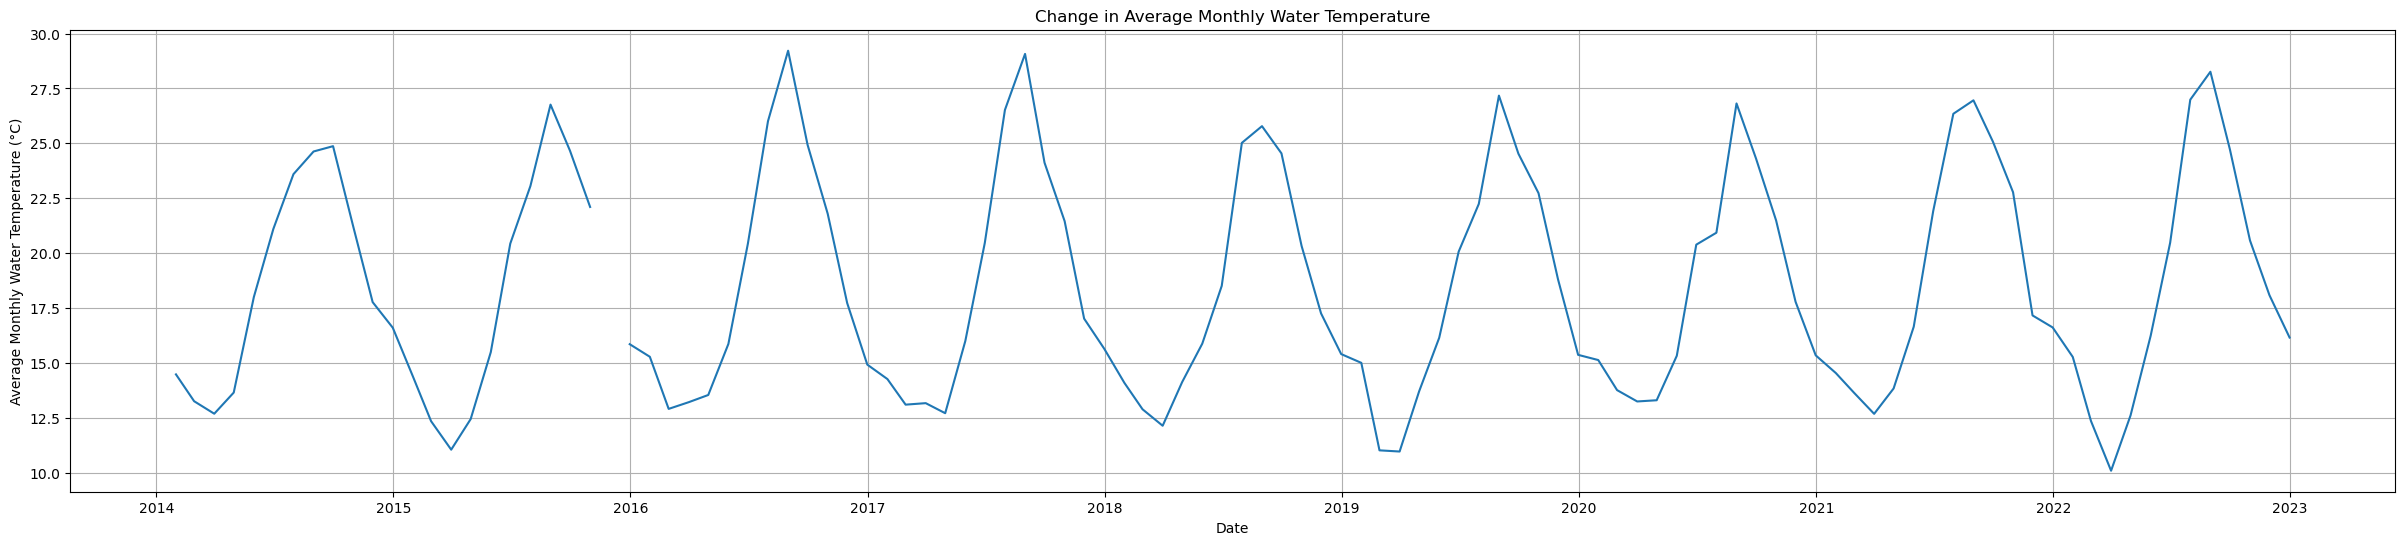

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))
plt.plot(monthly_avg_temp)
plt.xlabel('Date')
plt.ylabel('Average Monthly Water Temperature (°C)')
plt.title('Change in Average Monthly Water Temperature')
plt.grid(True)
plt.show()

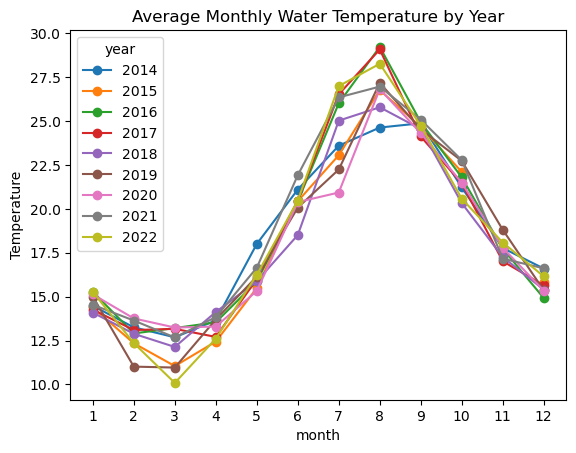

In [17]:
import matplotlib.pyplot as plt
# Group by year and month, and calculate the average temperature
yearly_monthly_avg = df.groupby([df.index.year, df.index.month])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and months as rows
yearly_monthly_avg = yearly_monthly_avg.unstack(level=0)

# Plot the average monthly water temperature for each month of each year
yearly_monthly_avg.plot(marker='o', linestyle='-')
plt.xlabel('month')
plt.ylabel('Temperature')
plt.title('Average Monthly Water Temperature by Year')
plt.legend(title='year')
plt.xticks(yearly_monthly_avg.index)
plt.show()

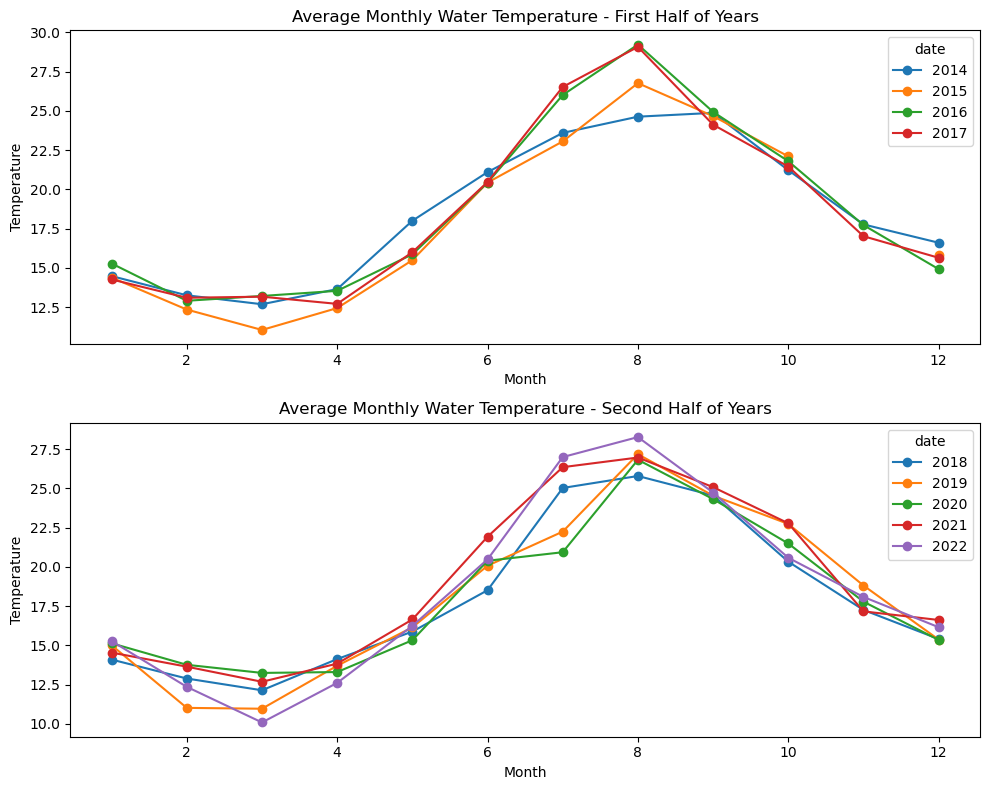

In [20]:
import matplotlib.pyplot as plt

# Group by year and month, and calculate the average temperature
yearly_monthly_avg = df.groupby([df.index.year, df.index.month])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and months as rows
yearly_monthly_avg = yearly_monthly_avg.unstack(level=0)

# Calculate the total number of years
num_years = yearly_monthly_avg.shape[1]

# Calculate the midpoint to divide the years into two groups
midpoint = num_years // 2

# Split the years into two groups
first_half_years = yearly_monthly_avg.iloc[:, :midpoint]
second_half_years = yearly_monthly_avg.iloc[:, midpoint:]

# Create two separate plots for the two groups of years
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot the first half of the years
first_half_years.plot(marker='o', linestyle='-', ax=axes[0])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Temperature')
axes[0].set_title('Average Monthly Water Temperature - First Half of Years')

# Plot the second half of the years
second_half_years.plot(marker='o', linestyle='-', ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Temperature')
axes[1].set_title('Average Monthly Water Temperature - Second Half of Years')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


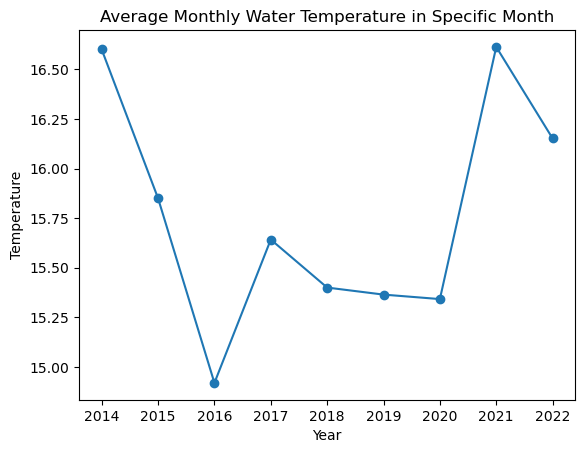

In [8]:
# Define the specific month you want to plot
target_month = 12  # August

# Filter the data for the specific month
specific_month_data = df[df.index.month == target_month]

# Group by year and calculate the average temperature
yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()

# Plot the average monthly water temperature for the specific month
yearly_avg_specific_month.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Monthly Water Temperature in Specific Month')
plt.show()

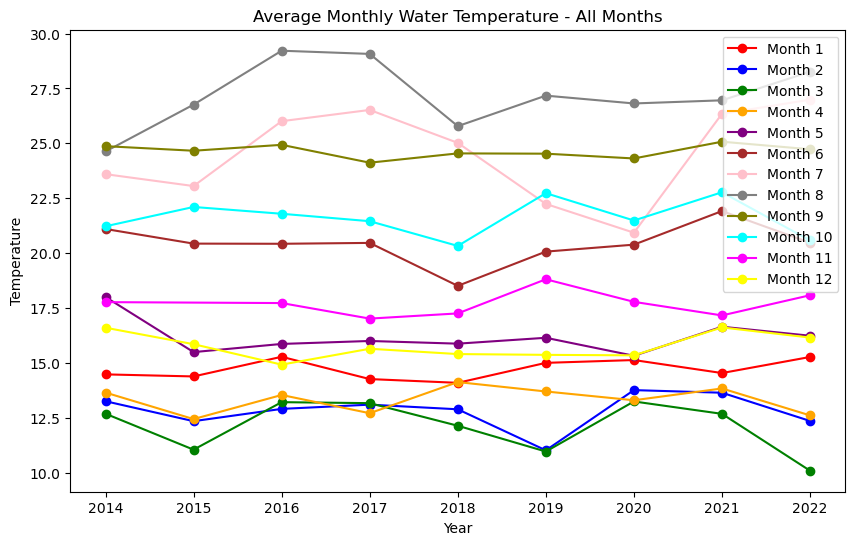

In [9]:

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each month and plot the average monthly water temperature
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Plot the average monthly water temperature for the specific month with a different color
    plt.plot(yearly_avg_specific_month.index, yearly_avg_specific_month.values, marker='o', linestyle='-', color=colors[i], label=f'Month {month}')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


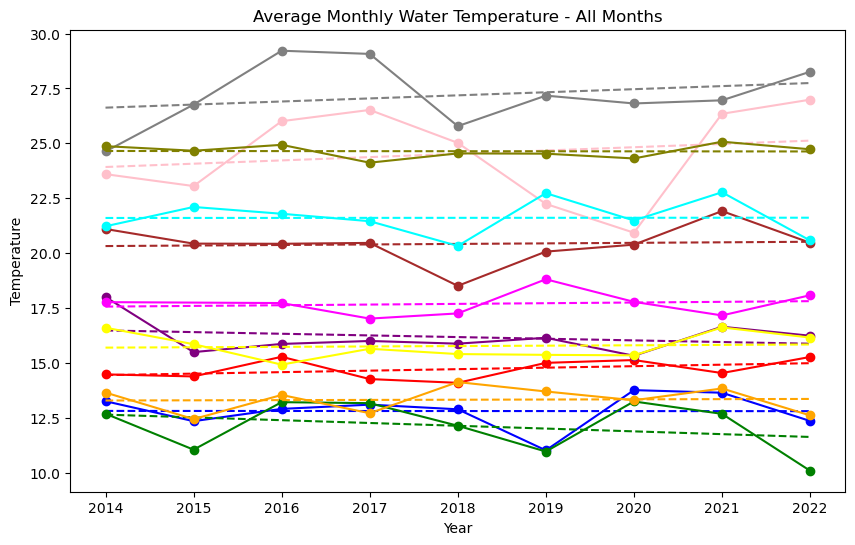

In [10]:

from sklearn.linear_model import LinearRegression

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each month and plot the average monthly water temperature
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Plot the average monthly water temperature for the specific month with a different color
    plt.plot(yearly_avg_specific_month.index, yearly_avg_specific_month.values, marker='o', linestyle='-', color=colors[i], label=f'Month {month}')

    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the linear regression line
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='--')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature - All Months')

# Display the plot
plt.show()


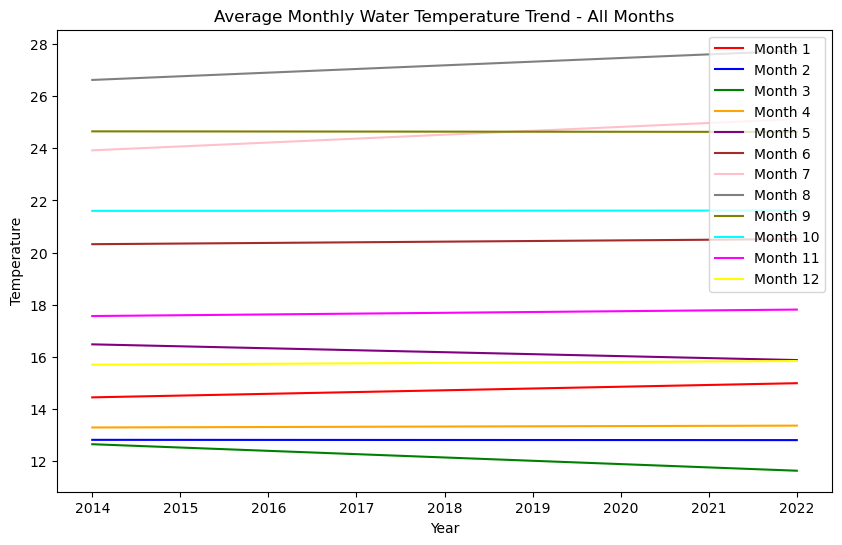

In [11]:

from sklearn.linear_model import LinearRegression

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each month and plot the average monthly water temperature trend
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the average monthly water temperature trend with a different color
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='-', label=f'Month {month}')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature Trend - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


Order of trends by prominence:
1. Month 7 - Slope: 0.1500824140017686
2. Month 8 - Slope: 0.1401554659498206
3. Month 1 - Slope: 0.06791002090800488
4. Month 11 - Slope: 0.030962210376262386
5. Month 6 - Slope: 0.0244136457412322
6. Month 12 - Slope: 0.01771505376344086
7. Month 4 - Slope: 0.00890801028057389
8. Month 10 - Slope: 0.0014959037378391756
9. Month 2 - Slope: -0.0013442465580398215
10. Month 9 - Slope: -0.002693008806951739
11. Month 5 - Slope: -0.07538766270515011
12. Month 3 - Slope: -0.1271572580645161


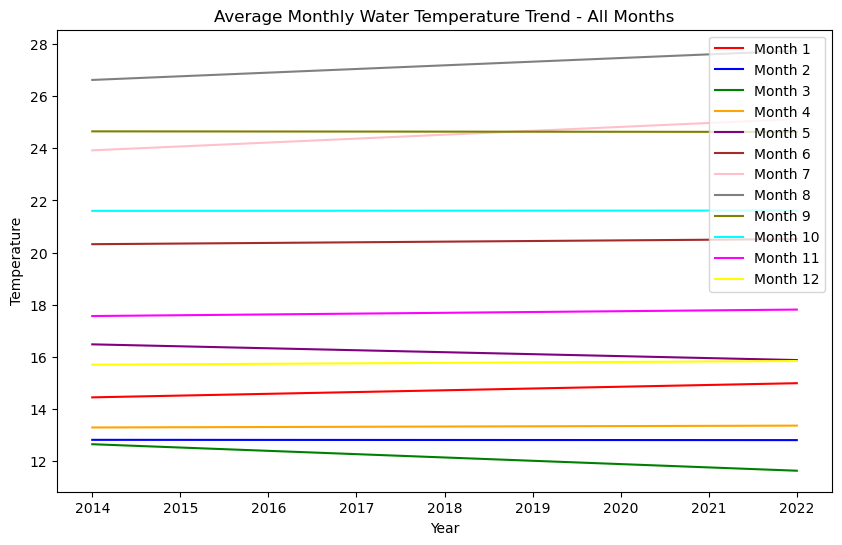

In [12]:

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Initialize a dictionary to store the slopes
slopes = {}

# Loop through each month and plot the average monthly water temperature trend
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Stemp(°C)'].mean()
    
    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the average monthly water temperature trend with a different color
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='-', label=f'Month {month}')
    
    # Calculate the slope of the trend line
    slope = reg.coef_[0][0]
    slopes[month] = slope

# Sort the slopes in descending order
sorted_slopes = sorted(slopes.items(), key=lambda x: x[1], reverse=True)

# Display the order of trends by prominence
print("Order of trends by prominence:")
for i, (month, slope) in enumerate(sorted_slopes):
    print(f"{i+1}. Month {month} - Slope: {slope}")

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature Trend - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


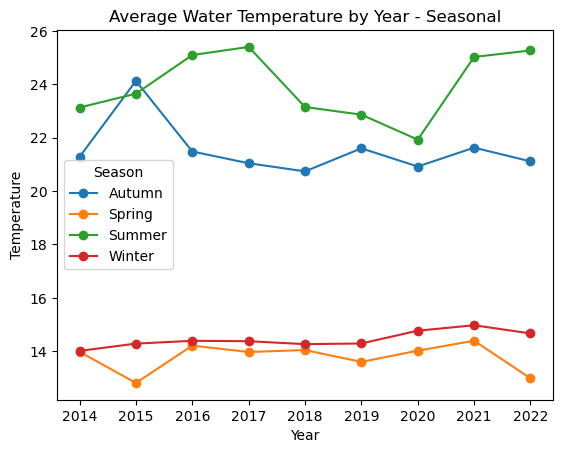

In [13]:
# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Plot the average water temperature for each year by season
yearly_seasonal_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature by Year - Seasonal')
plt.legend(title='Season')
plt.show()

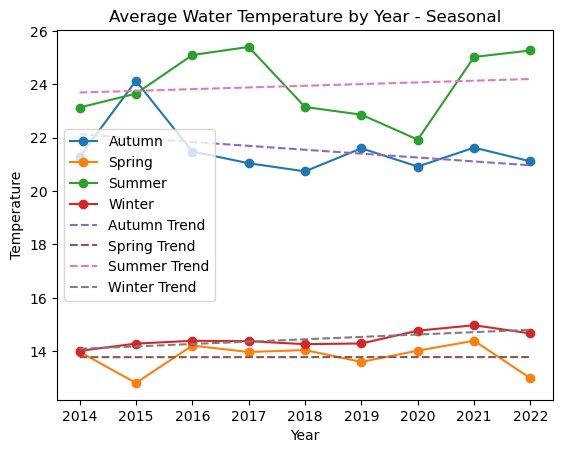

In [14]:

# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Plot the average water temperature for each year by season
yearly_seasonal_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature by Year - Seasonal')
plt.legend(title='Season')

# Add trend lines for each season
years = yearly_seasonal_avg_temp.index
seasons = yearly_seasonal_avg_temp.columns
for season in seasons:
    x = np.array(years).reshape(-1, 1)
    y = np.array(yearly_seasonal_avg_temp[season])
    model = LinearRegression()
    model.fit(x, y)
    trend_line = model.predict(x)
    plt.plot(years, trend_line, linestyle='--', label=f'{season} Trend')

plt.legend()
plt.show()


Order of trends by prominence:
1. Winter - Slope: 0.08927270470405421
2. Summer - Slope: 0.06329749552096078
3. Spring - Slope: 0.0004518867060942545
4. Autumn - Slope: -0.14585409077481135


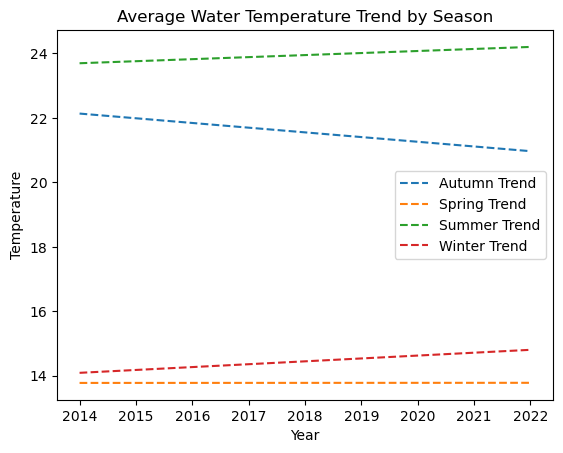

In [15]:
# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['Stemp(°C)'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Initialize a dictionary to store the slopes
slopes = {}

# Plot the trend lines for each season and calculate the slopes
years = yearly_seasonal_avg_temp.index
seasons = yearly_seasonal_avg_temp.columns
for season in seasons:
    x = np.array(years).reshape(-1, 1)
    y = np.array(yearly_seasonal_avg_temp[season])
    model = LinearRegression()
    model.fit(x, y)
    trend_line = model.predict(x)
    plt.plot(years, trend_line, linestyle='--', label=f'{season} Trend')
    slopes[season] = model.coef_[0]

# Sort the slopes in descending order
sorted_slopes = sorted(slopes.items(), key=lambda x: x[1], reverse=True)

# Display the order of trends by prominence
print("Order of trends by prominence:")
for i, (season, slope) in enumerate(sorted_slopes):
    print(f"{i+1}. {season} - Slope: {slope}")

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature Trend by Season')
plt.legend()
plt.show()
